# Final Merge

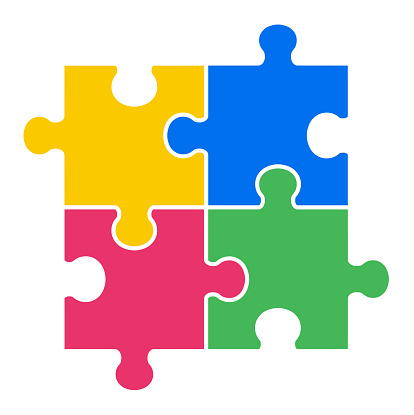

In this notebook I will merge all processed dataframes which I was analysing in seperate notebooks. I will try to experiment with various models to see which model gives most precise metrics and get desired kaggle score. After deciding which model I should choose as my final one, I will try to optimise it to make it faster and more reliable.

# Import Libraries

In [1]:
%load_ext nb_black
import homecredit_functions as hc
import imp

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
import time
import pandas as pd
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
from bayes_opt import BayesianOptimization

RANDOM_STATE = 0

<IPython.core.display.Javascript object>

# Import Datasets

## Application

In [2]:
path_application_train_proc = "data/application_train_proc.csv"
df_application_train_proc = pd.read_csv(path_application_train_proc)

<IPython.core.display.Javascript object>

In [3]:
df_application_train_proc.head(1)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,ANNUITY_CREDIT_RATIO,CREDIT_ANNUITY_RATIO,TARGET_NEIGHBORS_500_MEAN,GOODS_PRICE_AMT_ANNUITY_RATIO,GOODS_PRICE_AMT_INCOME_TOTAL_RATIO,GOODS_PRICE_AMT_CREDIT_RATIO,ANNUITY_DAYS_EMPLOYED_RATIO,ANNUITY_DAYS_BIRTH_RATIO,TARGET,SK_ID_CURR
0,0.00000,0.00151,0.09029,0.25632,0.88884,0.04509,0.85214,0.70543,1.00000,1.00000,...,0.31105,0.19041,0.54468,0.08367,0.02041,0.10717,0.99838,0.88820,1,100002


<IPython.core.display.Javascript object>

In [4]:
path_application_test_proc = "data/application_test_proc.csv"
df_application_test_proc = pd.read_csv(path_application_test_proc)

<IPython.core.display.Javascript object>

In [5]:
df_application_test_proc.head(1)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,EXT_SOURCE_MIN,ANNUITY_CREDIT_RATIO,CREDIT_ANNUITY_RATIO,TARGET_NEIGHBORS_500_MEAN,GOODS_PRICE_AMT_ANNUITY_RATIO,GOODS_PRICE_AMT_INCOME_TOTAL_RATIO,GOODS_PRICE_AMT_CREDIT_RATIO,ANNUITY_DAYS_EMPLOYED_RATIO,ANNUITY_DAYS_BIRTH_RATIO,SK_ID_CURR
0,0.00000,0.00093,0.13079,0.25700,0.33754,0.04067,0.79045,0.88718,1.00000,1.00000,...,0.18150,0.13697,0.40086,0.11915,0.14272,0.03929,0.09607,0.99961,0.95603,100001


<IPython.core.display.Javascript object>

## Previous Application

In [6]:
path_prev_application_train_proc = "data/previous_application_train_proc.csv"
df_prev_application_train_proc = pd.read_csv(path_prev_application_train_proc)

<IPython.core.display.Javascript object>

In [7]:
df_prev_application_train_proc.head(1)

,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_NFLAG_LAST_APPL_IN_DAY_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MEAN,PREV_SELLERPLACE_AREA_MEAN,...,PREV_PRODUCT_COMBINATION_CashXSellmiddle_MEAN,PREV_PRODUCT_COMBINATION_POShouseholdwithinterest_MEAN,PREV_PRODUCT_COMBINATION_POShouseholdwithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSindustrywithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSindustrywithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSmobilewithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSmobilewithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSotherwithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSotherswithoutinterest_MEAN,SK_ID_CURR
0,0.03080,0.04421,0.04421,0.00000,0.04421,0.39130,1.00000,0.00001,0.79315,0.00013,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,100002.00000


<IPython.core.display.Javascript object>

In [8]:
path_prev_application_test_proc = "data/previous_application_test_proc.csv"
df_prev_application_test_proc = pd.read_csv(path_prev_application_test_proc)

<IPython.core.display.Javascript object>

In [9]:
df_prev_application_test_proc.head(1)

,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_NFLAG_LAST_APPL_IN_DAY_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MEAN,PREV_SELLERPLACE_AREA_MEAN,...,PREV_PRODUCT_COMBINATION_CashXSellmiddle_MEAN,PREV_PRODUCT_COMBINATION_POShouseholdwithinterest_MEAN,PREV_PRODUCT_COMBINATION_POShouseholdwithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSindustrywithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSindustrywithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSmobilewithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSmobilewithoutinterest_MEAN,PREV_PRODUCT_COMBINATION_POSotherwithinterest_MEAN,PREV_PRODUCT_COMBINATION_POSotherswithoutinterest_MEAN,SK_ID_CURR
0,0.01315,0.00613,0.00587,0.00124,0.00613,0.56522,1.00000,0.10541,0.40479,0.00001,...,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,100001.00000


<IPython.core.display.Javascript object>

## Pos Cash Balance

In [10]:
pos_cash_train_proc = "data/POS_CASH_balance_train_proc.csv"
df_pos_cash_train_proc = pd.read_csv(pos_cash_train_proc)

<IPython.core.display.Javascript object>

In [11]:
df_pos_cash_train_proc.head(1)

,PREV_MONTHS_BALANCE_MEAN,PREV_CNT_INSTALMENT_MEAN,PREV_CNT_INSTALMENT_FUTURE_MEAN,PREV_SK_DPD_MEAN,PREV_SK_DPD_DEF_MEAN,PREV_MONTHS_BALANCE_MAX,PREV_CNT_INSTALMENT_MAX,PREV_CNT_INSTALMENT_FUTURE_MAX,PREV_SK_DPD_MAX,PREV_SK_DPD_DEF_MAX,...,PREV_SK_DPD_DEF_SUM,PREV_NAME_CONTRACT_STATUS_Amortizeddebt_MEAN,PREV_NAME_CONTRACT_STATUS_Approved_MEAN,PREV_NAME_CONTRACT_STATUS_Canceled_MEAN,PREV_NAME_CONTRACT_STATUS_Completed_MEAN,PREV_NAME_CONTRACT_STATUS_Demand_MEAN,PREV_NAME_CONTRACT_STATUS_Returnedtothestore_MEAN,PREV_NAME_CONTRACT_STATUS_Signed_MEAN,PREV_NAME_CONTRACT_STATUS_XNA_MEAN,SK_ID_CURR
0,0.90526,0.32394,0.25000,0.00000,0.00000,1.00000,0.27711,0.28571,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100002.00000


<IPython.core.display.Javascript object>

In [12]:
pos_cash_test_proc = "data/POS_CASH_balance_test_proc.csv"
df_pos_cash_test_proc = pd.read_csv(pos_cash_test_proc)

<IPython.core.display.Javascript object>

In [13]:
df_pos_cash_test_proc.head(1)

,PREV_MONTHS_BALANCE_MEAN,PREV_CNT_INSTALMENT_MEAN,PREV_CNT_INSTALMENT_FUTURE_MEAN,PREV_SK_DPD_MEAN,PREV_SK_DPD_DEF_MEAN,PREV_MONTHS_BALANCE_MAX,PREV_CNT_INSTALMENT_MAX,PREV_CNT_INSTALMENT_FUTURE_MAX,PREV_SK_DPD_MAX,PREV_SK_DPD_DEF_MAX,...,PREV_SK_DPD_DEF_SUM,PREV_NAME_CONTRACT_STATUS_Amortizeddebt_MEAN,PREV_NAME_CONTRACT_STATUS_Approved_MEAN,PREV_NAME_CONTRACT_STATUS_Canceled_MEAN,PREV_NAME_CONTRACT_STATUS_Completed_MEAN,PREV_NAME_CONTRACT_STATUS_Demand_MEAN,PREV_NAME_CONTRACT_STATUS_Returnedtothestore_MEAN,PREV_NAME_CONTRACT_STATUS_Signed_MEAN,PREV_NAME_CONTRACT_STATUS_XNA_MEAN,SK_ID_CURR
0,0.24678,0.04225,0.02407,0.00030,0.00045,0.45263,0.03614,0.04762,0.00165,0.00208,...,0.00004,0.00000,0.00000,0.00000,0.22222,0.00000,0.00000,0.00000,0.00000,100001.00000


<IPython.core.display.Javascript object>

## Installments Payments

In [14]:
path_inst_payment_train_proc = "data/installments_payments_train_proc.csv"
df_inst_payment_train_proc = pd.read_csv(path_inst_payment_train_proc)

<IPython.core.display.Javascript object>

In [15]:
df_inst_payment_train_proc.head(1)

,INST_NUM_INSTALMENT_VERSION_MEAN,INST_NUM_INSTALMENT_NUMBER_MEAN,INST_DAYS_INSTALMENT_MEAN,INST_DAYS_ENTRY_PAYMENT_MEAN,INST_AMT_INSTALMENT_MEAN,INST_AMT_PAYMENT_MEAN,INST_NUM_INSTALMENT_VERSION_MAX,INST_NUM_INSTALMENT_NUMBER_MAX,INST_DAYS_INSTALMENT_MAX,INST_DAYS_ENTRY_PAYMENT_MAX,...,INST_AMT_PAYMENT_SUM,INST_DAYS_INSTALLMENT_LATE_MEAN,INST_PAYMENT_DISCREPANCY_MEAN,INST_DAYS_INSTALLMENT_LATE_MAX,INST_PAYMENT_DISCREPANCY_MAX,INST_DAYS_INSTALLMENT_LATE_MIN,INST_PAYMENT_DISCREPANCY_MIN,INST_DAYS_INSTALLMENT_LATE_SUM,INST_PAYMENT_DISCREPANCY_SUM,SK_ID_CURR
0,0.02699,0.06564,0.89997,0.89817,0.00462,0.00462,0.01124,0.06522,0.99178,0.98436,...,0.00860,0.87400,0.69782,0.02259,0.01583,0.95263,0.99226,0.89146,0.59253,100002.00000


<IPython.core.display.Javascript object>

In [16]:
path_inst_payment_test_proc = "data/installments_payments_test_proc.csv"
df_inst_payment_test_proc = pd.read_csv(path_inst_payment_test_proc)

<IPython.core.display.Javascript object>

In [17]:
df_inst_payment_test_proc.head(1)

,INST_NUM_INSTALMENT_VERSION_MEAN,INST_NUM_INSTALMENT_NUMBER_MEAN,INST_DAYS_INSTALMENT_MEAN,INST_DAYS_ENTRY_PAYMENT_MEAN,INST_AMT_INSTALMENT_MEAN,INST_AMT_PAYMENT_MEAN,INST_NUM_INSTALMENT_VERSION_MAX,INST_NUM_INSTALMENT_NUMBER_MAX,INST_DAYS_INSTALMENT_MAX,INST_DAYS_ENTRY_PAYMENT_MAX,...,INST_AMT_PAYMENT_SUM,INST_DAYS_INSTALLMENT_LATE_MEAN,INST_PAYMENT_DISCREPANCY_MEAN,INST_DAYS_INSTALLMENT_LATE_MAX,INST_PAYMENT_DISCREPANCY_MAX,INST_DAYS_INSTALLMENT_LATE_MIN,INST_PAYMENT_DISCREPANCY_MIN,INST_DAYS_INSTALLMENT_LATE_SUM,INST_PAYMENT_DISCREPANCY_SUM,SK_ID_CURR
0,0.02930,0.01250,0.25155,0.28553,0.00235,0.00235,0.01124,0.01087,0.44608,0.47003,...,0.00161,0.86797,0.69782,0.02414,0.01583,0.94507,0.99226,0.88786,0.59253,100001.00000


<IPython.core.display.Javascript object>

## Credit Card Balance

In [18]:
path_credit_balance_train_proc = "data/credit_card_balance_train_proc.csv"
df_credit_balance_train_proc = pd.read_csv(path_credit_balance_train_proc)

<IPython.core.display.Javascript object>

In [19]:
df_credit_balance_train_proc.head(1)

,CRED_MONTHS_BALANCE_MEAN,CRED_AMT_BALANCE_MEAN,CRED_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CRED_AMT_DRAWINGS_ATM_CURRENT_MEAN,CRED_AMT_DRAWINGS_CURRENT_MEAN,CRED_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CRED_AMT_DRAWINGS_POS_CURRENT_MEAN,CRED_AMT_INST_MIN_REGULARITY_MEAN,CRED_AMT_PAYMENT_CURRENT_MEAN,CRED_AMT_PAYMENT_TOTAL_CURRENT_MEAN,...,CRED_CNT_INSTALMENT_MATURE_CUM_SUM,CRED_SK_DPD_SUM,CRED_SK_DPD_DEF_SUM,CRED_NAME_CONTRACT_STATUS_Approved_MEAN,CRED_NAME_CONTRACT_STATUS_Completed_MEAN,CRED_NAME_CONTRACT_STATUS_Demand_MEAN,CRED_NAME_CONTRACT_STATUS_Refused_MEAN,CRED_NAME_CONTRACT_STATUS_Sentproposal_MEAN,CRED_NAME_CONTRACT_STATUS_Signed_MEAN,SK_ID_CURR
0,0.77633,0.03191,0.11091,0.00504,0.00309,0.00000,0.00034,0.03950,0.00872,0.00364,...,0.00628,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100002.00000


<IPython.core.display.Javascript object>

In [20]:
path_credit_balance_test_proc = "data/credit_card_balance_test_proc.csv"
df_credit_balance_test_proc = pd.read_csv(path_credit_balance_test_proc)

<IPython.core.display.Javascript object>

In [21]:
df_credit_balance_test_proc.head(1)

,CRED_MONTHS_BALANCE_MEAN,CRED_AMT_BALANCE_MEAN,CRED_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CRED_AMT_DRAWINGS_ATM_CURRENT_MEAN,CRED_AMT_DRAWINGS_CURRENT_MEAN,CRED_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CRED_AMT_DRAWINGS_POS_CURRENT_MEAN,CRED_AMT_INST_MIN_REGULARITY_MEAN,CRED_AMT_PAYMENT_CURRENT_MEAN,CRED_AMT_PAYMENT_TOTAL_CURRENT_MEAN,...,CRED_CNT_INSTALMENT_MATURE_CUM_SUM,CRED_SK_DPD_SUM,CRED_SK_DPD_DEF_SUM,CRED_NAME_CONTRACT_STATUS_Approved_MEAN,CRED_NAME_CONTRACT_STATUS_Completed_MEAN,CRED_NAME_CONTRACT_STATUS_Demand_MEAN,CRED_NAME_CONTRACT_STATUS_Refused_MEAN,CRED_NAME_CONTRACT_STATUS_Sentproposal_MEAN,CRED_NAME_CONTRACT_STATUS_Signed_MEAN,SK_ID_CURR
0,0.77633,0.02073,0.10803,0.00435,0.00233,0.00000,0.00082,0.02678,0.00897,0.00301,...,0.00554,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100001.00000


<IPython.core.display.Javascript object>

## Bureau  

In [22]:
path_bureau_train_proc = "data/bureau_train_proc.csv"
df_bureau_train_proc = pd.read_csv(path_bureau_train_proc)

<IPython.core.display.Javascript object>

In [23]:
df_bureau_train_proc.head(1)

,BUR_DAYS_CREDIT_MEAN,BUR_CREDIT_DAY_OVERDUE_MEAN,BUR_DAYS_CREDIT_ENDDATE_MEAN,BUR_DAYS_ENDDATE_FACT_MEAN,BUR_AMT_CREDIT_MAX_OVERDUE_MEAN,BUR_CNT_CREDIT_PROLONG_MEAN,BUR_AMT_CREDIT_SUM_MEAN,BUR_AMT_CREDIT_SUM_DEBT_MEAN,BUR_AMT_CREDIT_SUM_LIMIT_MEAN,BUR_AMT_CREDIT_SUM_OVERDUE_MEAN,...,BUR_CLOSED_CREDIT_TYPE_Interbankcredit_MEAN,BUR_CLOSED_CREDIT_TYPE_Loanforbusinessdevelopment_MEAN,BUR_CLOSED_CREDIT_TYPE_Loanforpurchaseofsharesmarginlending_MEAN,BUR_CLOSED_CREDIT_TYPE_Loanforthepurchaseofequipment_MEAN,BUR_CLOSED_CREDIT_TYPE_Loanforworkingcapitalreplenishment_MEAN,BUR_CLOSED_CREDIT_TYPE_Microloan_MEAN,BUR_CLOSED_CREDIT_TYPE_Mortgage_MEAN,BUR_CLOSED_CREDIT_TYPE_Realestateloan_MEAN,BUR_CLOSED_CREDIT_TYPE_Unknowntypeofloan_MEAN,SK_ID_CURR
0,0.70089,0.00000,0.56828,0.91673,0.00001,0.00000,0.00055,0.02532,0.02303,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100002.00000


<IPython.core.display.Javascript object>

In [24]:
path_bureau_test_proc = "data/bureau_test_proc.csv"
df_bureau_test_proc = pd.read_csv(path_bureau_test_proc)

<IPython.core.display.Javascript object>

In [25]:
df_bureau_test_proc.head(1)

,BUR_DAYS_CREDIT_MEAN,BUR_CREDIT_DAY_OVERDUE_MEAN,BUR_DAYS_CREDIT_ENDDATE_MEAN,BUR_DAYS_ENDDATE_FACT_MEAN,BUR_AMT_CREDIT_MAX_OVERDUE_MEAN,BUR_CNT_CREDIT_PROLONG_MEAN,BUR_AMT_CREDIT_SUM_MEAN,BUR_AMT_CREDIT_SUM_DEBT_MEAN,BUR_AMT_CREDIT_SUM_LIMIT_MEAN,BUR_AMT_CREDIT_SUM_OVERDUE_MEAN,...,BUR_CLOSED_CREDIT_TYPE_Interbankcredit_MEAN,BUR_CLOSED_CREDIT_TYPE_Loanforbusinessdevelopment_MEAN,BUR_CLOSED_CREDIT_TYPE_Loanforpurchaseofsharesmarginlending_MEAN,BUR_CLOSED_CREDIT_TYPE_Loanforthepurchaseofequipment_MEAN,BUR_CLOSED_CREDIT_TYPE_Loanforworkingcapitalreplenishment_MEAN,BUR_CLOSED_CREDIT_TYPE_Microloan_MEAN,BUR_CLOSED_CREDIT_TYPE_Mortgage_MEAN,BUR_CLOSED_CREDIT_TYPE_Realestateloan_MEAN,BUR_CLOSED_CREDIT_TYPE_Unknowntypeofloan_MEAN,SK_ID_CURR
0,0.74846,0.00000,0.57419,0.90145,0.00000,0.00000,0.00105,0.02613,0.02129,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100001.00000


<IPython.core.display.Javascript object>

## Bureau Balance

In [26]:
path_bureau_bal_train_proc = "data/bureau_bal_train_proc.csv"
df_bureau_bal_train_proc = pd.read_csv(path_bureau_bal_train_proc)

<IPython.core.display.Javascript object>

In [27]:
df_bureau_bal_train_proc.head(1)

,BUR_BAL_MONTHS_BALANCE_MEAN,BUR_BAL_MONTHS_BALANCE_MAX,BUR_BAL_MONTHS_BALANCE_MIN,BUR_BAL_MONTHS_BALANCE_SUM,BUR_BAL_STATUS_1_MEAN,BUR_BAL_STATUS_2_MEAN,BUR_BAL_STATUS_3_MEAN,BUR_BAL_STATUS_4_MEAN,BUR_BAL_STATUS_5_MEAN,BUR_BAL_STATUS_C_MEAN,BUR_BAL_STATUS_X_MEAN,SK_ID_CURR
0,0.73455,1.00000,0.51042,0.96542,0.27944,0.00000,0.00000,0.00000,0.00000,0.20909,0.13636,100002.00000


<IPython.core.display.Javascript object>

In [28]:
path_bureau_bal_test_proc = "data/bureau_bal_test_proc.csv"
df_bureau_bal_test_proc = pd.read_csv(path_bureau_bal_test_proc)

<IPython.core.display.Javascript object>

In [29]:
df_bureau_bal_test_proc.head(1)

,BUR_BAL_MONTHS_BALANCE_MEAN,BUR_BAL_MONTHS_BALANCE_MAX,BUR_BAL_MONTHS_BALANCE_MIN,BUR_BAL_MONTHS_BALANCE_SUM,BUR_BAL_STATUS_1_MEAN,BUR_BAL_STATUS_2_MEAN,BUR_BAL_STATUS_3_MEAN,BUR_BAL_STATUS_4_MEAN,BUR_BAL_STATUS_5_MEAN,BUR_BAL_STATUS_C_MEAN,BUR_BAL_STATUS_X_MEAN,SK_ID_CURR
0,0.82401,1.00000,0.46875,0.96416,0.00662,0.00000,0.00000,0.00000,0.00000,0.63953,0.17442,100001.00000


<IPython.core.display.Javascript object>

# Merge Datasets

## Merge Train 

In [30]:
%%time
df_train_full = df_application_train_proc.merge(df_prev_application_train_proc,how="left", on="SK_ID_CURR")
df_train_full = df_train_full.merge(df_pos_cash_train_proc,how="left", on="SK_ID_CURR")
df_train_full = df_train_full.merge(df_inst_payment_train_proc,how="left", on="SK_ID_CURR")
df_train_full = df_train_full.merge(df_credit_balance_train_proc,how="left", on="SK_ID_CURR")
df_train_full = df_train_full.merge(df_bureau_train_proc,how="left", on="SK_ID_CURR")
df_train_full = df_train_full.merge(df_bureau_bal_train_proc,how="left", on="SK_ID_CURR")

Wall time: 20.1 s


<IPython.core.display.Javascript object>

In [31]:
df_train_full.head(1)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,BUR_BAL_MONTHS_BALANCE_MAX,BUR_BAL_MONTHS_BALANCE_MIN,BUR_BAL_MONTHS_BALANCE_SUM,BUR_BAL_STATUS_1_MEAN,BUR_BAL_STATUS_2_MEAN,BUR_BAL_STATUS_3_MEAN,BUR_BAL_STATUS_4_MEAN,BUR_BAL_STATUS_5_MEAN,BUR_BAL_STATUS_C_MEAN,BUR_BAL_STATUS_X_MEAN
0,0.00000,0.00151,0.09029,0.25632,0.88884,0.04509,0.85214,0.70543,1.00000,1.00000,...,1.00000,0.51042,0.96542,0.27944,0.00000,0.00000,0.00000,0.00000,0.20909,0.13636


<IPython.core.display.Javascript object>

## Merge Test

In [32]:
%%time
df_test_full = df_application_test_proc.merge(df_prev_application_test_proc,how="left", on="SK_ID_CURR")
df_test_full = df_test_full.merge(df_pos_cash_test_proc,how="left", on="SK_ID_CURR")
df_test_full = df_test_full.merge(df_inst_payment_test_proc,how="left", on="SK_ID_CURR")
df_test_full = df_test_full.merge(df_credit_balance_test_proc,how="left", on="SK_ID_CURR")
df_test_full = df_test_full.merge(df_bureau_test_proc,how="left", on="SK_ID_CURR")
df_test_full = df_test_full.merge(df_bureau_bal_test_proc,how="left", on="SK_ID_CURR")

Wall time: 2.25 s


<IPython.core.display.Javascript object>

In [33]:
df_test_full.head(1)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,BUR_BAL_MONTHS_BALANCE_MAX,BUR_BAL_MONTHS_BALANCE_MIN,BUR_BAL_MONTHS_BALANCE_SUM,BUR_BAL_STATUS_1_MEAN,BUR_BAL_STATUS_2_MEAN,BUR_BAL_STATUS_3_MEAN,BUR_BAL_STATUS_4_MEAN,BUR_BAL_STATUS_5_MEAN,BUR_BAL_STATUS_C_MEAN,BUR_BAL_STATUS_X_MEAN
0,0.00000,0.00093,0.13079,0.25700,0.33754,0.04067,0.79045,0.88718,1.00000,1.00000,...,1.00000,0.46875,0.96416,0.00662,0.00000,0.00000,0.00000,0.00000,0.63953,0.17442


<IPython.core.display.Javascript object>

## Save Merged Dataframes

In [34]:
df_train_full.to_csv("data/train_full.csv", index=False)
df_test_full.to_csv("data/test_full.csv", index=False)

<IPython.core.display.Javascript object>

## Load Merged Dataframes

In [2]:
df_train_full = pd.read_csv("data/train_full.csv")
df_test_full = pd.read_csv("data/test_full.csv")

<IPython.core.display.Javascript object>

# Baseline Model

In [3]:
X_train_full = df_train_full.drop(columns=["TARGET", "SK_ID_CURR"])
X_test_full = df_test_full.drop(columns=["SK_ID_CURR"])

y_train_full = df_train_full["TARGET"]

<IPython.core.display.Javascript object>

In [4]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full,
    y_train_full,
    stratify=y_train_full,
    test_size=0.2,
    random_state=RANDOM_STATE,
)

<IPython.core.display.Javascript object>

In [5]:
# Sample for model speed test
speed_test_sample = [X_val.iloc[0]]

<IPython.core.display.Javascript object>

## Logistic Regression

In [98]:
log_clsf = SGDClassifier(
    alpha=0.0001,
    penalty="l1",
    loss="log",
    class_weight="balanced",
    random_state=RANDOM_STATE,
)

<IPython.core.display.Javascript object>

In [99]:
%%time
log_clsf.fit(X_train,y_train)

Wall time: 1min 10s


SGDClassifier(class_weight='balanced', loss='log', penalty='l1', random_state=0)

<IPython.core.display.Javascript object>

In [100]:
%%time
log_sig_clsf = CalibratedClassifierCV(log_clsf, method="sigmoid")
log_sig_clsf.fit(X_train, y_train)

Wall time: 3min 23s


CalibratedClassifierCV(base_estimator=SGDClassifier(class_weight='balanced',
                                                    loss='log', penalty='l1',
                                                    random_state=0))

<IPython.core.display.Javascript object>

In [101]:
%%time
y_pred_train, y_pred_val = hc.get_binary_predictions(log_clsf, X_train, X_val)
y_pred_train_prob, y_pred_val_prob = hc.get_prob_predictions(
    log_sig_clsf, X_train, X_val
)

accuracy_score_train, accuracy_score_val = hc.get_accuracy_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
precision_score_train, precision_score_val = hc.get_precision_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
recall_score_train, recall_score_val = hc.get_recall_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
roc_auc_score_train, roc_auc_score_val = hc.get_roc_auc_score(
    y_train, y_pred_train_prob, y_val, y_pred_val_prob
)

Training accuracy is 0.7732756658320055
Validation accuracy is 0.7744662861974213
Training precision is 0.20269196384225688
Validation precision is 0.20419821974226118
Training recall is 0.6164652567975831
Validation recall is 0.6191339375629406
Training ROC AUC is 0.781143892731192
Validation ROC AUC is 0.7842382510108166
Wall time: 5.5 s


<IPython.core.display.Javascript object>

In [102]:
time_start = time.time()
log_sig_clsf.predict(speed_test_sample)
model_speed = time.time() - time_start
print(f"Logistic regression single input speed = {model_speed}")

Logistic regression single input speed = 0.007950782775878906


<IPython.core.display.Javascript object>

In [103]:
df_scores = pd.DataFrame()

dict_scores = {
    "Model": ["LogReg"],
    "Notes": ["Baseline All Features"],
    "Accuracy_train": [accuracy_score_train],
    "Accuracy_val": [accuracy_score_val],
    "Precision_train": [precision_score_train],
    "Precision_val": [precision_score_val],
    "Recall_train": [recall_score_train],
    "Recall_val": [recall_score_val],
    "ROC_AUC_train": [roc_auc_score_train],
    "ROC_AUC_val": [roc_auc_score_val],
    "Private_score": [0.77138],
    "Public_score": [0.77364],
    "Speed": [model_speed],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val,Private_score,Public_score,Speed
0,LogReg,Baseline All Features,0.77328,0.77447,0.20269,0.20420,0.61647,0.61913,0.78114,0.78424,0.77138,0.77364,0.00795


<IPython.core.display.Javascript object>

As we can see logistic regression produce quite low precision scores, although as we found from other notebooks it's a problem with highly imbalanced target. Model is quite fast, to make one prediction it takes around 0.0795 of a second.

## Random Forest

In [104]:
rf_clsf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=7,
    class_weight="balanced",
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

<IPython.core.display.Javascript object>

In [105]:
%%time
rf_clsf.fit(X_train, y_train)

Wall time: 13min


RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=1000,
                       n_jobs=-1, random_state=0)

<IPython.core.display.Javascript object>

In [106]:
%%time
y_pred_train, y_pred_val = hc.get_binary_predictions(rf_clsf, X_train, X_val)
y_pred_train_prob, y_pred_val_prob = hc.get_prob_predictions(
    rf_clsf, X_train, X_val
)

accuracy_score_train, accuracy_score_val = hc.get_accuracy_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
precision_score_train, precision_score_val = hc.get_precision_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
recall_score_train, recall_score_val = hc.get_recall_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
roc_auc_score_train, roc_auc_score_val = hc.get_roc_auc_score(
    y_train, y_pred_train_prob, y_val, y_pred_val_prob
)

Training accuracy is 0.7172368378264121
Validation accuracy is 0.7164691153277076
Training precision is 0.1789940064069443
Validation precision is 0.17600914333212114
Training recall is 0.6977341389728097
Validation recall is 0.6823766364551863
Training ROC AUC is 0.7823956367476808
Validation ROC AUC is 0.768570498993681
Wall time: 52.3 s


<IPython.core.display.Javascript object>

In [107]:
time_start = time.time()
rf_clsf.predict(speed_test_sample)
model_speed = time.time() - time_start
print(f"Random forest single input speed = {model_speed}")

Random forest single input speed = 0.4544870853424072


<IPython.core.display.Javascript object>

In [108]:
dict_scores = {
    "Model": ["Random Forest"],
    "Notes": ["Baseline All Features"],
    "Accuracy_train": [accuracy_score_train],
    "Accuracy_val": [accuracy_score_val],
    "Precision_train": [precision_score_train],
    "Precision_val": [precision_score_val],
    "Recall_train": [recall_score_train],
    "Recall_val": [recall_score_val],
    "ROC_AUC_train": [roc_auc_score_train],
    "ROC_AUC_val": [roc_auc_score_val],
    "Private_score": [0.75001],
    "Public_score": [0.75509],
    "Speed": [model_speed],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores = df_scores.reset_index(drop=True)
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val,Private_score,Public_score,Speed
0,LogReg,Baseline All Features,0.77328,0.77447,0.20269,0.20420,0.61647,0.61913,0.78114,0.78424,0.77138,0.77364,0.00795
1,Random Forest,Baseline All Features,0.71724,0.71647,0.17899,0.17601,0.69773,0.68238,0.78240,0.76857,0.75001,0.75509,0.45449


<IPython.core.display.Javascript object>

Random forest performed worse in all metrics comparing to logistic regression (except on Recall validation set). Moreover speed was significantly slower and reached 0.45449 of a second.

##  LGBM

In [40]:
LGBM_clsf = LGBMClassifier(
    class_weight="balanced",
    n_estimators=200,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    metric="auc",
)

<IPython.core.display.Javascript object>

In [110]:
%%time
LGBM_clsf.fit(X_train, y_train)

Wall time: 1min 19s


LGBMClassifier(class_weight='balanced', metric='auc', n_estimators=200,
               random_state=0)

<IPython.core.display.Javascript object>

In [111]:
%%time
y_pred_train, y_pred_val = hc.get_binary_predictions(LGBM_clsf, X_train, X_val)
y_pred_train_prob, y_pred_val_prob = hc.get_prob_predictions(
    LGBM_clsf, X_train, X_val
)

accuracy_score_train, accuracy_score_val = hc.get_accuracy_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
precision_score_train, precision_score_val = hc.get_precision_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
recall_score_train, recall_score_val = hc.get_recall_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
roc_auc_score_train, roc_auc_score_val = hc.get_roc_auc_score(
    y_train, y_pred_train_prob, y_val, y_pred_val_prob
)

Training accuracy is 0.7668653051933271
Validation accuracy is 0.7492642635318603
Training precision is 0.23088959389041214
Validation precision is 0.19776852815354376
Training recall is 0.8098690835850957
Validation recall is 0.6890231621349446
Training ROC AUC is 0.8714514177287247
Validation ROC AUC is 0.7963885726385593
Wall time: 16 s


<IPython.core.display.Javascript object>

In [118]:
time_start = time.time()
LGBM_clsf.predict(speed_test_sample)
model_speed = time.time() - time_start
print(f"LGBM single input speed = {model_speed}")

Random forest single input speed = 0.0959784984588623


<IPython.core.display.Javascript object>

In [119]:
dict_scores = {
    "Model": ["LGBM"],
    "Notes": ["Baseline All Features"],
    "Accuracy_train": [accuracy_score_train],
    "Accuracy_val": [accuracy_score_val],
    "Precision_train": [precision_score_train],
    "Precision_val": [precision_score_val],
    "Recall_train": [recall_score_train],
    "Recall_val": [recall_score_val],
    "ROC_AUC_train": [roc_auc_score_train],
    "ROC_AUC_val": [roc_auc_score_val],
    "Private_score": [0.78464],
    "Public_score": [0.77687],
    "Speed": [model_speed],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores = df_scores.reset_index(drop=True)
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val,Private_score,Public_score,Speed
0,LogReg,Baseline All Features,0.77328,0.77447,0.20269,0.20420,0.61647,0.61913,0.78114,0.78424,0.77138,0.77364,0.00795
1,Random Forest,Baseline All Features,0.71724,0.71647,0.17899,0.17601,0.69773,0.68238,0.78240,0.76857,0.75001,0.75509,0.45449
2,LGBM,Baseline All Features,0.76687,0.74926,0.23089,0.19777,0.80987,0.68902,0.87145,0.79639,0.78464,0.77687,0.09598


<IPython.core.display.Javascript object>

In [120]:
hc.get_importance(LGBM_clsf, X_train_full, 20)

,Feature,Weight
234,TARGET_NEIGHBORS_500_MEAN,168
4,DAYS_BIRTH,108
649,BUR_CREDIT_AVG_MAX,84
238,ANNUITY_DAYS_EMPLOYED_RATIO,76
87,EXT_SOURCE_1,69
236,GOODS_PRICE_AMT_INCOME_TOTAL_RATIO,64
7,DAYS_ID_PUBLISH,61
99,AMT_ANNUITY,59
439,PREV_CNT_INSTALMENT_FUTURE_MEAN,57
231,EXT_SOURCE_MIN,56


<IPython.core.display.Javascript object>

We can see that LGBM model performed with better results in Kaggle leaderboard then other two models. Although we can see it started to overfit model quite a bit. Gap between training and validation ROC_AUC scores are the biggest compared with logistic regression or random forest scores. TARGET_NEIGHBORS_500_MEAN feature taken from kaggle's winner solution  is a top feature and really boost our model. 

Because LGBM model performed with best kaggle's score I will choose it for further optimisation.

## Save And Load Scores

In [122]:
df_scores.to_csv("data/final_scores_baseline.csv", index=False)

<IPython.core.display.Javascript object>

In [31]:
df_scores = pd.read_csv("data/final_scores_baseline.csv")
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val,Private_score,Public_score,Speed
0,LogReg,Baseline All Features,0.77328,0.77447,0.20269,0.20420,0.61647,0.61913,0.78114,0.78424,0.77138,0.77364,0.00795
1,Random Forest,Baseline All Features,0.71724,0.71647,0.17899,0.17601,0.69773,0.68238,0.78240,0.76857,0.75001,0.75509,0.45449
2,LGBM,Baseline All Features,0.76687,0.74926,0.23089,0.19777,0.80987,0.68902,0.87145,0.79639,0.78464,0.77687,0.09598


<IPython.core.display.Javascript object>

# Feature Selection

For feature selection I will use recursive feature elimination  with LGBM model. We essentially first fit our model using all the features in a given set, then progressively one by one we remove the least significant features, each time re-fitting, until we are left with the desired number of features, which is set by the parameter n_features_to_select. Although because we want optimal features, Sklearn provides a similar RFECV class which implements recursive feature elimination with cross-validation and automatically finds the optimal number of features to keep.

In [35]:
LGBM_clsf = LGBMClassifier(
    class_weight="balanced",
    n_estimators=200,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    metric="auc",
)

<IPython.core.display.Javascript object>

In [36]:
%%time
rfecv = RFECV(
    estimator=LGBM_clsf,
    min_features_to_select=100,
    step=100,
    n_jobs=-1,
    scoring="roc_auc",
    cv=5
)

rfecv.fit(X_val, y_val)

Wall time: 13min 49s


RFECV(cv=5,
      estimator=LGBMClassifier(class_weight='balanced', metric='auc',
                               n_estimators=200, random_state=0),
      min_features_to_select=100, n_jobs=-1, scoring='roc_auc', step=100)

<IPython.core.display.Javascript object>

In [37]:
print("Optimal number of features: {}".format(rfecv.n_features_))

Optimal number of features: 299


<IPython.core.display.Javascript object>

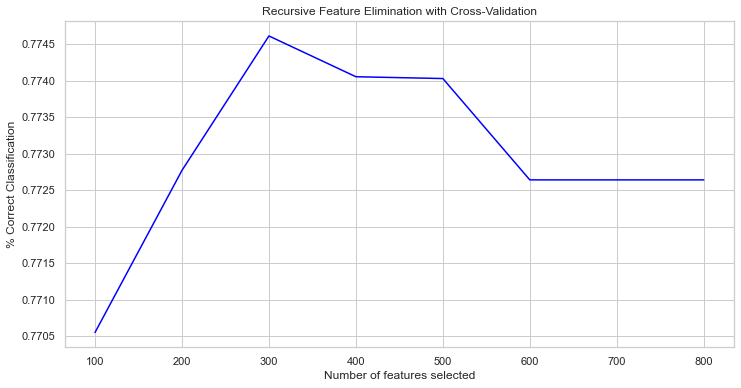

<IPython.core.display.Javascript object>

In [89]:
plt.figure(figsize=(12, 6))
plt.title("Recursive Feature Elimination with Cross-Validation")
plt.xlabel("Number of features selected")
plt.ylabel("% Correct Classification")
plt.plot(
    range(100, len(rfecv.grid_scores_) * 100 + 100, 100),
    rfecv.grid_scores_,
    color="blue",
)

plt.show()

In [38]:
df_rfecv = pd.DataFrame(
    {
        "Features": X_train.columns[rfecv.support_],
        "Importance": rfecv.estimator_.feature_importances_,
    }
)
df_rfecv = df_rfecv.sort_values(by="Importance", ascending=False)
df_rfecv[:10]

,Features,Importance
53,TARGET_NEIGHBORS_500_MEAN,147
57,ANNUITY_DAYS_EMPLOYED_RATIO,72
36,AMT_ANNUITY,68
3,DAYS_BIRTH,67
6,DAYS_ID_PUBLISH,65
47,EXT_SOURCE_MEAN,62
37,EXT_SOURCE_2,60
238,BUR_CREDIT_AVG_MAX,59
49,EXT_SOURCE_MAX,57
33,EXT_SOURCE_1,55


<IPython.core.display.Javascript object>

In [39]:
LGBM_clsf = LGBMClassifier(
    class_weight="balanced",
    n_estimators=200,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    metric="auc",
)

<IPython.core.display.Javascript object>

In [40]:
rfecv_features = df_rfecv["Features"].values

<IPython.core.display.Javascript object>

In [41]:
%%time
LGBM_clsf.fit(X_train[rfecv_features], y_train)

Wall time: 58.2 s


LGBMClassifier(class_weight='balanced', metric='auc', n_estimators=200,
               random_state=0)

<IPython.core.display.Javascript object>

In [42]:
%%time
y_pred_train, y_pred_val = hc.get_binary_predictions(LGBM_clsf, X_train[rfecv_features], X_val[rfecv_features])
y_pred_train_prob, y_pred_val_prob = hc.get_prob_predictions(
    LGBM_clsf, X_train[rfecv_features], X_val[rfecv_features]
)

accuracy_score_train, accuracy_score_val = hc.get_accuracy_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
precision_score_train, precision_score_val = hc.get_precision_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
recall_score_train, recall_score_val = hc.get_recall_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
roc_auc_score_train, roc_auc_score_val = hc.get_roc_auc_score(
    y_train, y_pred_train_prob, y_val, y_pred_val_prob
)

Training accuracy is 0.764129621800917
Validation accuracy is 0.7462887989203779
Training precision is 0.22897315722198552
Validation precision is 0.19646219686162625
Training recall is 0.8117824773413898
Validation recall is 0.6934541792547835
Training ROC AUC is 0.8696927239727387
Validation ROC AUC is 0.7959647027939786
Wall time: 7.89 s


<IPython.core.display.Javascript object>

In [43]:
# Sample for model speed test
rfecv_speed_test_sample = [X_val[rfecv_features].iloc[0]]

<IPython.core.display.Javascript object>

In [45]:
time_start = time.time()
LGBM_clsf.predict(rfecv_speed_test_sample)
model_speed = time.time() - time_start
print(f"LGBM single input speed = {model_speed}")

LGBM single input speed = 0.0009980201721191406


<IPython.core.display.Javascript object>

In [46]:
dict_scores = {
    "Model": ["LGBM"],
    "Notes": ["RFE 299 features"],
    "Accuracy_train": [accuracy_score_train],
    "Accuracy_val": [accuracy_score_val],
    "Precision_train": [precision_score_train],
    "Precision_val": [precision_score_val],
    "Recall_train": [recall_score_train],
    "Recall_val": [recall_score_val],
    "ROC_AUC_train": [roc_auc_score_train],
    "ROC_AUC_val": [roc_auc_score_val],
    "Private_score": [0.78126],
    "Public_score": [0.78299],
    "Speed": [model_speed],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores = df_scores.reset_index(drop=True)
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val,Private_score,Public_score,Speed
0,LogReg,Baseline All Features,0.77328,0.77447,0.20269,0.20420,0.61647,0.61913,0.78114,0.78424,0.77138,0.77364,0.00795
1,Random Forest,Baseline All Features,0.71724,0.71647,0.17899,0.17601,0.69773,0.68238,0.78240,0.76857,0.75001,0.75509,0.45449
2,LGBM,Baseline All Features,0.76687,0.74926,0.23089,0.19777,0.80987,0.68902,0.87145,0.79639,0.78464,0.77687,0.09598
3,LGBM,RFE 299 features,0.76413,0.74629,0.22897,0.19646,0.81178,0.69345,0.86969,0.79596,0.78126,0.78299,0.00100


<IPython.core.display.Javascript object>

As we can see RFE did a great job of reducing features count! Less than double features gave us slightly lower Kaggle's private score, but model with less features seemingly better generalize on public set. Most importantly model speed increased almost 100 times and became even faster than logistic regresion.

Although in this competition my main goal is to achieve the highest private score as possible. Therefore I will keep all features and move on hyperparameter tweeking. For production most likely I would choose this model as it is much faster.

## Save And Load Scores

In [47]:
df_scores.to_csv("data/final_scores_rfecv.csv", index=False)

<IPython.core.display.Javascript object>

In [3]:
df_scores = pd.read_csv("data/final_scores_rfecv.csv")
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val,Private_score,Public_score,Speed
0,LogReg,Baseline All Features,0.77328,0.77447,0.20269,0.20420,0.61647,0.61913,0.78114,0.78424,0.77138,0.77364,0.00795
1,Random Forest,Baseline All Features,0.71724,0.71647,0.17899,0.17601,0.69773,0.68238,0.78240,0.76857,0.75001,0.75509,0.45449
2,LGBM,Baseline All Features,0.76687,0.74926,0.23089,0.19777,0.80987,0.68902,0.87145,0.79639,0.78464,0.77687,0.09598
3,LGBM,RFE 299 features,0.76413,0.74629,0.22897,0.19646,0.81178,0.69345,0.86969,0.79596,0.78126,0.78299,0.00100


<IPython.core.display.Javascript object>

# HyperParameter Tuning

## Logistic Regression

In [84]:
def get_log_auc_val_score(alpha: float, penalty: str) -> float:
    """Function that gets stochastic logistic regression AUC validation score."""
    log_clsf = SGDClassifier(
        alpha=alpha,
        penalty=penalty,
        loss="log",
        class_weight="balanced",
        random_state=RANDOM_STATE,
    )
    log_clsf.fit(X_train, y_train)
    log_sig_clsf = CalibratedClassifierCV(log_clsf, method="sigmoid")
    log_sig_clsf.fit(X_train, y_train)
    y_pred_val_prob = log_sig_clsf.predict_proba(X_val)[:, 1]
    roc_auc_score_val = roc_auc_score(y_val, y_pred_val_prob)

    return roc_auc_score_val

<IPython.core.display.Javascript object>

In [85]:
alpha = [0.001, 0.0001, 0.00005]
penalty = ["l1", "l2"]
parameters = list(product(alpha, penalty))

cv_scores = []

for param in tqdm(parameters):
    auc_val_score = get_log_auc_val_score(param[0], param[1])
    cv_scores.append(auc_val_score)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [19:11<00:00, 191.85s/it]


<IPython.core.display.Javascript object>

In [99]:
best_parameters = parameters[cv_scores.index(max(cv_scores))]
print(
    f"Best logistic regression AUC val score {max(cv_scores)} was achieved with {best_parameters} parameters"
)

Best logistic regression AUC val score 0.7862327815455296 was achieved with (5e-05, 'l1') parameters


<IPython.core.display.Javascript object>

In [111]:
log_clsf = SGDClassifier(
    alpha=0.00005,
    penalty="l1",
    loss="log",
    class_weight="balanced",
    random_state=RANDOM_STATE,
)

<IPython.core.display.Javascript object>

In [112]:
log_clsf.fit(X_train, y_train)

SGDClassifier(alpha=5e-05, class_weight='balanced', loss='log', penalty='l1',
              random_state=0)

<IPython.core.display.Javascript object>

In [113]:
log_sig_clsf = CalibratedClassifierCV(log_clsf, method="sigmoid")

<IPython.core.display.Javascript object>

In [114]:
log_sig_clsf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=5e-05,
                                                    class_weight='balanced',
                                                    loss='log', penalty='l1',
                                                    random_state=0))

<IPython.core.display.Javascript object>

In [102]:
%%time
y_pred_train, y_pred_val = hc.get_binary_predictions(log_clsf, X_train, X_val)
y_pred_train_prob, y_pred_val_prob = hc.get_prob_predictions(
    log_sig_clsf, X_train, X_val
)

accuracy_score_train, accuracy_score_val = hc.get_accuracy_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
precision_score_train, precision_score_val = hc.get_precision_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
recall_score_train, recall_score_val = hc.get_recall_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
roc_auc_score_train, roc_auc_score_val = hc.get_roc_auc_score(
    y_train, y_pred_train_prob, y_val, y_pred_val_prob
)

Training accuracy is 0.7522113102012943
Validation accuracy is 0.7543534461733574
Training precision is 0.19406562648880418
Validation precision is 0.19615361572104728
Training recall is 0.6563444108761329
Validation recall is 0.6594159113796576
Training ROC AUC is 0.7836981845485033
Validation ROC AUC is 0.7862327815455296
Wall time: 7.08 s


<IPython.core.display.Javascript object>

In [128]:
time_start = time.time()
log_sig_clsf.predict(speed_test_sample)
model_speed = time.time() - time_start
print(f"Logistic regression single input speed = {model_speed}")

Logistic regression single input speed = 0.006989219665527344


<IPython.core.display.Javascript object>

In [129]:
dict_scores = {
    "Model": ["LogReg"],
    "Notes": ["Hyperparameters"],
    "Accuracy_train": [accuracy_score_train],
    "Accuracy_val": [accuracy_score_val],
    "Precision_train": [precision_score_train],
    "Precision_val": [precision_score_val],
    "Recall_train": [recall_score_train],
    "Recall_val": [recall_score_val],
    "ROC_AUC_train": [roc_auc_score_train],
    "ROC_AUC_val": [roc_auc_score_val],
    "Private_score": [0.77472],
    "Public_score": [0.77358],
    "Speed": [model_speed],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores = df_scores.reset_index(drop=True)
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val,Private_score,Public_score,Speed
0,LogReg,Baseline All Features,0.77328,0.77447,0.20269,0.20420,0.61647,0.61913,0.78114,0.78424,0.77138,0.77364,0.00795
1,Random Forest,Baseline All Features,0.71724,0.71647,0.17899,0.17601,0.69773,0.68238,0.78240,0.76857,0.75001,0.75509,0.45449
2,LGBM,Baseline All Features,0.76687,0.74926,0.23089,0.19777,0.80987,0.68902,0.87145,0.79639,0.78464,0.77687,0.09598
3,LGBM,RFE 299 features,0.76413,0.74629,0.22897,0.19646,0.81178,0.69345,0.86969,0.79596,0.78126,0.78299,0.00100
4,LogReg,Hyperparameters,0.75221,0.75435,0.19407,0.19615,0.65634,0.65942,0.78370,0.78623,0.77472,0.77358,0.00699


<IPython.core.display.Javascript object>

There is not a lot of hyperparameters to tune on logistic regression, but slightly decreased alpha increased Kaggle private and public scores.

## LGBM

For LGBM hyperparameter tuning I will use bayesian optimization which in contrast to grid search, works by building a probability model of the objective function, which could be the score to be maximized, i.e. ROC-AUC in our case, and uses this model to find the optimal set of hyperparameters that maximizes or minimizes this objective function. This model is built and updated recursively by looking at the scores obtained for each of the previous sets of hyperparameters.

In [96]:
def lgbm_score(**params) -> float:

    """
    Function for optimization of auc score.
    """
    params["num_leaves"] = int(params["num_leaves"])
    params["max_depth"] = int(params["max_depth"])

    LGBM_clsf = LGBMClassifier(
        **params,
        n_estimators=1000,
        class_weight="balanced",
        random_state=RANDOM_STATE,
        n_jobs=-1,
        metric="auc"
    )
    LGBM_clsf.fit(X_train, y_train)

    y_pred_val_proba = LGBM_clsf.predict_proba(X_val)[:, 1]
    roc_auc_score_val = roc_auc_score(y_val, y_pred_val_proba)

    return roc_auc_score_val

<IPython.core.display.Javascript object>

In [97]:
%%time
params = {
    "learning_rate": (0.01, 0.1),
    "num_leaves": (30, 50),  
    "subsample": (0.5,1), 
    "max_depth": (5, 12),  
    "reg_alpha": (0.001, 0.3),  
    "reg_lambda": (0.001, 0.3), 
}

bo = BayesianOptimization(lgbm_score, params,random_state=RANDOM_STATE)
bo.maximize(init_points=6, n_iter=4)

|   iter    |  target   | learni... | max_depth | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.7886   |  0.05939  |  10.01    |  42.06    |  0.1639   |  0.1277   |  0.8229   |
|  2        |  0.7909   |  0.04938  |  11.24    |  49.27    |  0.1156   |  0.2377   |  0.7644   |
|  3        |  0.7922   |  0.06112  |  11.48    |  31.42    |  0.02705  |  0.007045 |  0.9163   |
|  4        |  0.7805   |  0.08003  |  11.09    |  49.57    |  0.2399   |  0.139    |  0.8903   |
|  5        |  0.7992   |  0.02064  |  9.479    |  32.87    |  0.2835   |  0.157    |  0.7073   |
|  6        |  0.7968   |  0.03381  |  10.42    |  39.12    |  0.171    |  0.006618 |  0.8088   |
|  7        |  0.7987   |  0.01608  |  9.439    |  32.81    |  0.154    |  0.2334   |  0.7844   |
|  8        |  0.7973   |  0.03407  |  9.056    |  32.81    |  0.3      |  0.1196   |  0.5791   |
|  9        |  0.793

<IPython.core.display.Javascript object>

In [132]:
LGBM_clsf = LGBMClassifier(
    class_weight="balanced",
    n_estimators=1000,
    random_state=RANDOM_STATE,
    learning_rate=0.02064,
    num_leaves=33,
    subsample=0.7073,
    max_depth=9,
    reg_alpha=0.2835,
    reg_lambda=0.157,
    n_jobs=-1,
    metric="auc",
)

<IPython.core.display.Javascript object>

In [133]:
%%time
LGBM_clsf.fit(X_train, y_train)

Wall time: 6min 19s


LGBMClassifier(class_weight='balanced', learning_rate=0.02064, max_depth=9,
               metric='auc', n_estimators=1000, num_leaves=33, random_state=0,
               reg_alpha=0.2835, reg_lambda=0.157, subsample=0.7073)

<IPython.core.display.Javascript object>

In [51]:
%%time
y_pred_train, y_pred_val = hc.get_binary_predictions(LGBM_clsf, X_train, X_val)
y_pred_train_prob, y_pred_val_prob = hc.get_prob_predictions(
    LGBM_clsf, X_train, X_val
)

accuracy_score_train, accuracy_score_val = hc.get_accuracy_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
precision_score_train, precision_score_val = hc.get_precision_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
recall_score_train, recall_score_val = hc.get_recall_scores(
    y_train, y_pred_train, y_val, y_pred_val
)
roc_auc_score_train, roc_auc_score_val = hc.get_roc_auc_score(
    y_train, y_pred_train_prob, y_val, y_pred_val_prob
)

Training accuracy is 0.772771617183181
Validation accuracy is 0.7526462123798839
Training precision is 0.23674214755295836
Validation precision is 0.19936634592818586
Training recall is 0.8159617321248741
Validation recall is 0.6843907351460221
Training ROC AUC is 0.8773848076764104
Validation ROC AUC is 0.7986717379290608
Wall time: 1min 3s


<IPython.core.display.Javascript object>

In [61]:
time_start = time.time()
LGBM_clsf.predict(speed_test_sample)
model_speed = time.time() - time_start
print(f"LGBM single input speed = {model_speed}")

LGBM single input speed = 0.013000736236572266


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Validation Set Confusion Matrix')

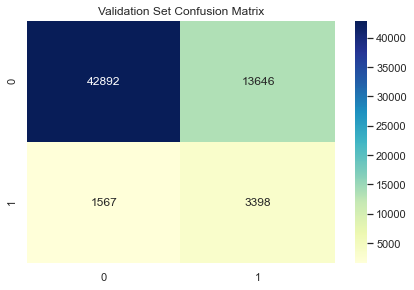

<IPython.core.display.Javascript object>

In [139]:
cnf_matrix = confusion_matrix(y_val, y_pred_val)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
plt.tight_layout()
plt.title("Validation Set Confusion Matrix")

In [143]:
print(f"All validation set defaulters count = {sum(y_val)}")

All validation set defaulters count = 4965


<IPython.core.display.Javascript object>

In [130]:
dict_scores = {
    "Model": ["LGBM"],
    "Notes": ["Hyperparameters"],
    "Accuracy_train": [accuracy_score_train],
    "Accuracy_val": [accuracy_score_val],
    "Precision_train": [precision_score_train],
    "Precision_val": [precision_score_val],
    "Recall_train": [recall_score_train],
    "Recall_val": [recall_score_val],
    "ROC_AUC_train": [roc_auc_score_train],
    "ROC_AUC_val": [roc_auc_score_val],
    "Private_score": [0.78466],
    "Public_score": [0.78218],
    "Speed": [model_speed],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores = df_scores.reset_index(drop=True)
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val,Private_score,Public_score,Speed
0,LogReg,Baseline All Features,0.77328,0.77447,0.20269,0.20420,0.61647,0.61913,0.78114,0.78424,0.77138,0.77364,0.00795
1,Random Forest,Baseline All Features,0.71724,0.71647,0.17899,0.17601,0.69773,0.68238,0.78240,0.76857,0.75001,0.75509,0.45449
2,LGBM,Baseline All Features,0.76687,0.74926,0.23089,0.19777,0.80987,0.68902,0.87145,0.79639,0.78464,0.77687,0.09598
3,LGBM,RFE 299 features,0.76413,0.74629,0.22897,0.19646,0.81178,0.69345,0.86969,0.79596,0.78126,0.78299,0.00100
4,LogReg,Hyperparameters,0.75221,0.75435,0.19407,0.19615,0.65634,0.65942,0.78370,0.78623,0.77472,0.77358,0.00699
5,LGBM,Hyperparameters,0.77277,0.75265,0.23674,0.19937,0.81596,0.68439,0.87738,0.79867,0.78466,0.78218,0.01300


<IPython.core.display.Javascript object>

Hyperparameter tuning almost had no impact to private score although it increased public score quite a bit. Interestingly speed was much faster than LGBM  model without hyperparameter tweeking. Looking into confusion matrix we see that we still have some false negative predictions.If we would take percentage from all defaulters and false negative predictions we would get that 31.5 percent was not indentified as defaulter, which depending on the defaulters loans can be quite a big number.

# Out-of-fold Predictions

In K-fold cross validation the predictions are made on test data and this doesn't include train data.These predictions are called Out of fold predictions. So they are basically predictions during K-fold cross validation on hold out examples. I will use this technique to make my final LGBM submission.

In [64]:
folds = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)

train_pred_proba = np.zeros(y_train_full.shape[0])
test_pred_proba = np.zeros(len(X_test_full))

for n_fold, (train_idx, valid_idx) in tqdm(
    enumerate(folds.split(X_train_full, y_train_full))
):
    train_x, train_y = X_train_full.iloc[train_idx], y_train_full.iloc[train_idx]
    valid_x, valid_y = X_train_full.iloc[valid_idx], y_train_full.iloc[valid_idx]

    LGBM_clsf = LGBMClassifier(
        class_weight="balanced",
        n_estimators=1000,
        random_state=RANDOM_STATE,
        learning_rate=0.02064,
        num_leaves=33,
        subsample=0.7073,
        max_depth=9,
        reg_alpha=0.2835,
        reg_lambda=0.157,
        n_jobs=-1,
        metric="auc",
    )

    LGBM_clsf.fit(
        train_x,
        train_y,
        eval_set=[(train_x, train_y), (valid_x, valid_y)],
        verbose=False,
        early_stopping_rounds=100,
    )

    train_pred_proba[valid_idx] = LGBM_clsf.predict_proba(
        valid_x, num_iteration=LGBM_clsf.best_iteration_
    )[:, 1]
    test_pred_proba += (
        LGBM_clsf.predict_proba(X_test_full, num_iteration=LGBM_clsf.best_iteration_)[
            :, 1
        ]
        / folds.n_splits
    )

del train_x, train_y, valid_x, valid_y

10it [1:17:41, 466.19s/it]


<IPython.core.display.Javascript object>

In [6]:
roc_auc_score_train = roc_auc_score(y_train_full, train_pred_proba)

dict_scores = {
    "Model": ["LGBM"],
    "Notes": ["K-fold"],
    "Accuracy_train": [None],
    "Accuracy_val": [None],
    "Precision_train": [None],
    "Precision_val": [None],
    "Recall_train": [None],
    "Recall_val": [None],
    "ROC_AUC_train": [None],
    "ROC_AUC_val": [roc_auc_score_train],
    "Private_score": [0.78749],
    "Public_score": [0.78528],
    "Speed": [None],
}
df_scores = df_scores.append(pd.DataFrame(dict_scores))
df_scores = df_scores.reset_index(drop=True)
df_scores

,Model,Notes,Accuracy_train,Accuracy_val,Precision_train,Precision_val,Recall_train,Recall_val,ROC_AUC_train,ROC_AUC_val,Private_score,Public_score,Speed
0,LogReg,Baseline All Features,0.77328,0.77447,0.20269,0.20420,0.61647,0.61913,0.78114,0.78424,0.77138,0.77364,0.00795
1,Random Forest,Baseline All Features,0.71724,0.71647,0.17899,0.17601,0.69773,0.68238,0.78240,0.76857,0.75001,0.75509,0.45449
2,LGBM,Baseline All Features,0.76687,0.74926,0.23089,0.19777,0.80987,0.68902,0.87145,0.79639,0.78464,0.77687,0.09598
3,LGBM,RFE 299 features,0.76413,0.74629,0.22897,0.19646,0.81178,0.69345,0.86969,0.79596,0.78126,0.78299,0.00100
4,LogReg,Hyperparameters,0.75221,0.75435,0.19407,0.19615,0.65634,0.65942,0.78370,0.78623,0.77472,0.77358,0.00699
5,LGBM,Hyperparameters,0.77277,0.75265,0.23674,0.19937,0.81596,0.68439,0.87738,0.79867,0.78466,0.78218,0.01300
6,LGBM,K-fold,None,None,None,None,None,None,None,0.79507,0.78749,0.78528,None


<IPython.core.display.Javascript object>

As we can see using same LGBM model with tweaked hyperparameters, calculating Out-of-fold predictions gave as a little boost on private and public scores. Even though it decreased our ROC_AUC_val score.

## Save Out-of-fold Predictions

In [69]:
submission = pd.DataFrame(
    {"SK_ID_CURR": df_test_full["SK_ID_CURR"], "TARGET": test_pred_proba}
)
submission.to_csv("submission_final_kfold.csv", index=False)
submission

,SK_ID_CURR,TARGET
0,100001,0.28941
1,100005,0.54784
2,100013,0.09949
3,100028,0.15132
4,100038,0.53374
...,...,...
48739,456221,0.25129
48740,456222,0.25035
48741,456223,0.05614
48742,456224,0.12946


<IPython.core.display.Javascript object>

# Final Conclusion

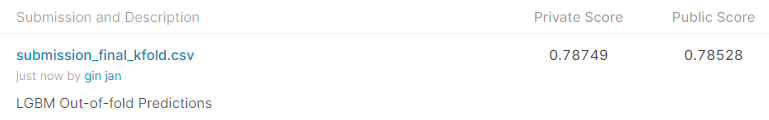

At the beginning I made my promise to achieve private leaderboard score better than median score which is 0.78592 and luckily I accomplished it. Although I still haven't tried to experiment with other imputation aproaches ( as I saw some people imputed with 0 values instead of median), I haven't touched any imbalanced data fixing algorithms and maybe response labeling would have helped to optimise our model even more. There is definitely still a lot of room for testing various approaches. In validation set I got quite many False Negative predictions, which should be more investigated and reduced, so home credit would get less financial loss in the future. 

Besides that I am pretty happy with LGBM model which ended to be fastest and most accurate from the three selected models. As we found feature engineering really helped to boost our scores.Imputing with different sophisticated approaches doesn't always produce better resutls or it can take so much extra time, which will not be allowed in production environment.
